# 03_MasterBDMl_modelo4_breastE2E_metricas
Autor: Carlos Wong <br/>
Fecha: 2022_04_17 <br/>
Tipo de problema: `CLASIFICACIÓN` <br/>
Entradas: `dataset: breast_cancer_data` <br/>
Salidas: modelo predictivo  <br/>
Propósito: Descarga, entrenamiento, predicción y documentación con `SKLEARN` <br/>
1. `Librerías + Descarga de datos <-------- `
2. Exploración de la variable objetivo
3. EDA (Exploración de datos)
4. Feature Engineering (Transformación de variables)
5. Selección de variables
6. Modelos (pipeline, semilla en train_test split y modelos, comparación modelos, tecnicas de entrenamiento)
7. `Métricas de evaluación <-------- `
8. Selección de algoritmo
9. Parametrización de algoritmo
10. Guardado del modelo

# 1. Librerías + Descarga de datos

In [1]:
# librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
#np.set_printoptions(precision=2)
pd.set_option('display.max_columns', 500)  # Muestra hasta 500 columnas del dataframe (evita los puntos '...'')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# librerías sklearn
import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut   # <------------------------
from sklearn.model_selection import cross_val_score, cross_val_predict   # <------------------------
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

In [4]:
# librerías de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [5]:
data = pd.read_csv(r'.\datasets\breast_cancer_data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
# Se eliminan columnas innecesarias
data = data.drop(['id','Unnamed: 32'], axis=1)

In [8]:
features = data.drop('diagnosis', axis=1)
target = data['diagnosis']

## 7. Métricas

In [9]:
# Ejercicio, mismo problema de antes, pero comparando 7 modelos de clasificación
X, y = features, target

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))

for name, model in models:
    scaler = StandardScaler()
    pipeline = make_pipeline(scaler, model)

    kf = KFold(n_splits=10, shuffle=True, random_state=99)
    cv_results = cross_val_score(pipeline,           # Pipeline
                                 features,           # Feature matrix
                                 target,             # Target vector
                                 cv=kf)              # Cross-validation technique

In [10]:
model # se usa el último del bucle 'for'

SVC()

In [11]:
kf    # se usa el que está dentro del bucle 'for'

KFold(n_splits=10, random_state=99, shuffle=True)

In [14]:
scoring = 'roc_auc'
results = cross_val_score(model, X, y, cv=kf, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.976 (0.015)


In [15]:
results # Un resultado de AUC por cada uno de los 10 folds

array([0.98382353, 0.98544974, 0.98783784, 0.98575499, 0.99488491,
       0.98280423, 0.95580808, 0.94949495, 0.95945946, 0.97265625])

## Entrenamiento sacando distintas métricas

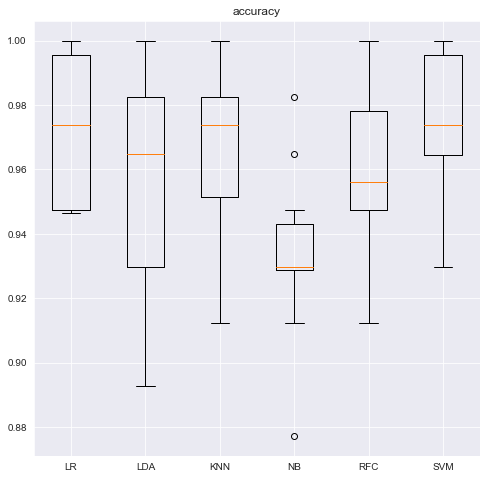

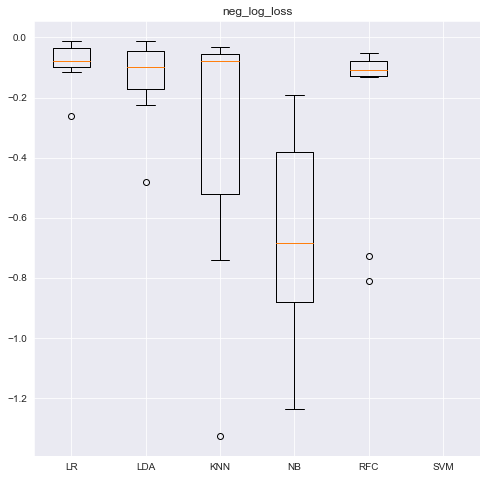

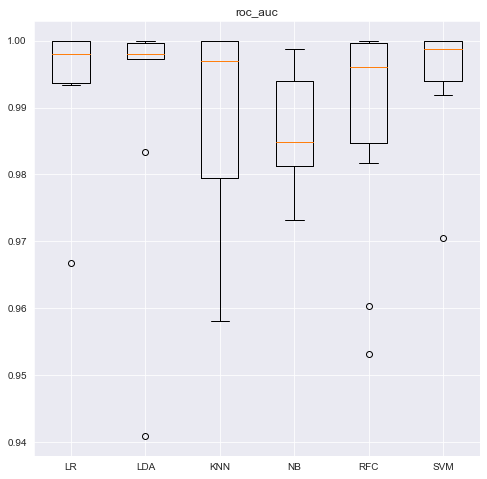

In [18]:
# !El mismo código anterior, lo único nuevo (<------)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))

scorings = ['accuracy', 'neg_log_loss', 'roc_auc']   #<--------------
for scoring in scorings:   #<--------------
    results = []   #<--------------
    names = []   #<--------------
    for name, model in models:
        scaler = StandardScaler()
        pipeline = make_pipeline(scaler, model)

        kf = KFold(n_splits=10, shuffle=True, random_state=157)
        cv_results = cross_val_score(pipeline,           # Pipeline
                                     features,           # Feature matrix
                                     target,             # Target vector
                                     cv=kf,              # Cross-validation technique
                                     scoring=scoring)    # Loss function  <----------------
        names.append(name)
        results.append(cv_results)

    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.title(scoring)   #<--------------
    plt.show()